/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_9882/3504288439.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(response.text)[0]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


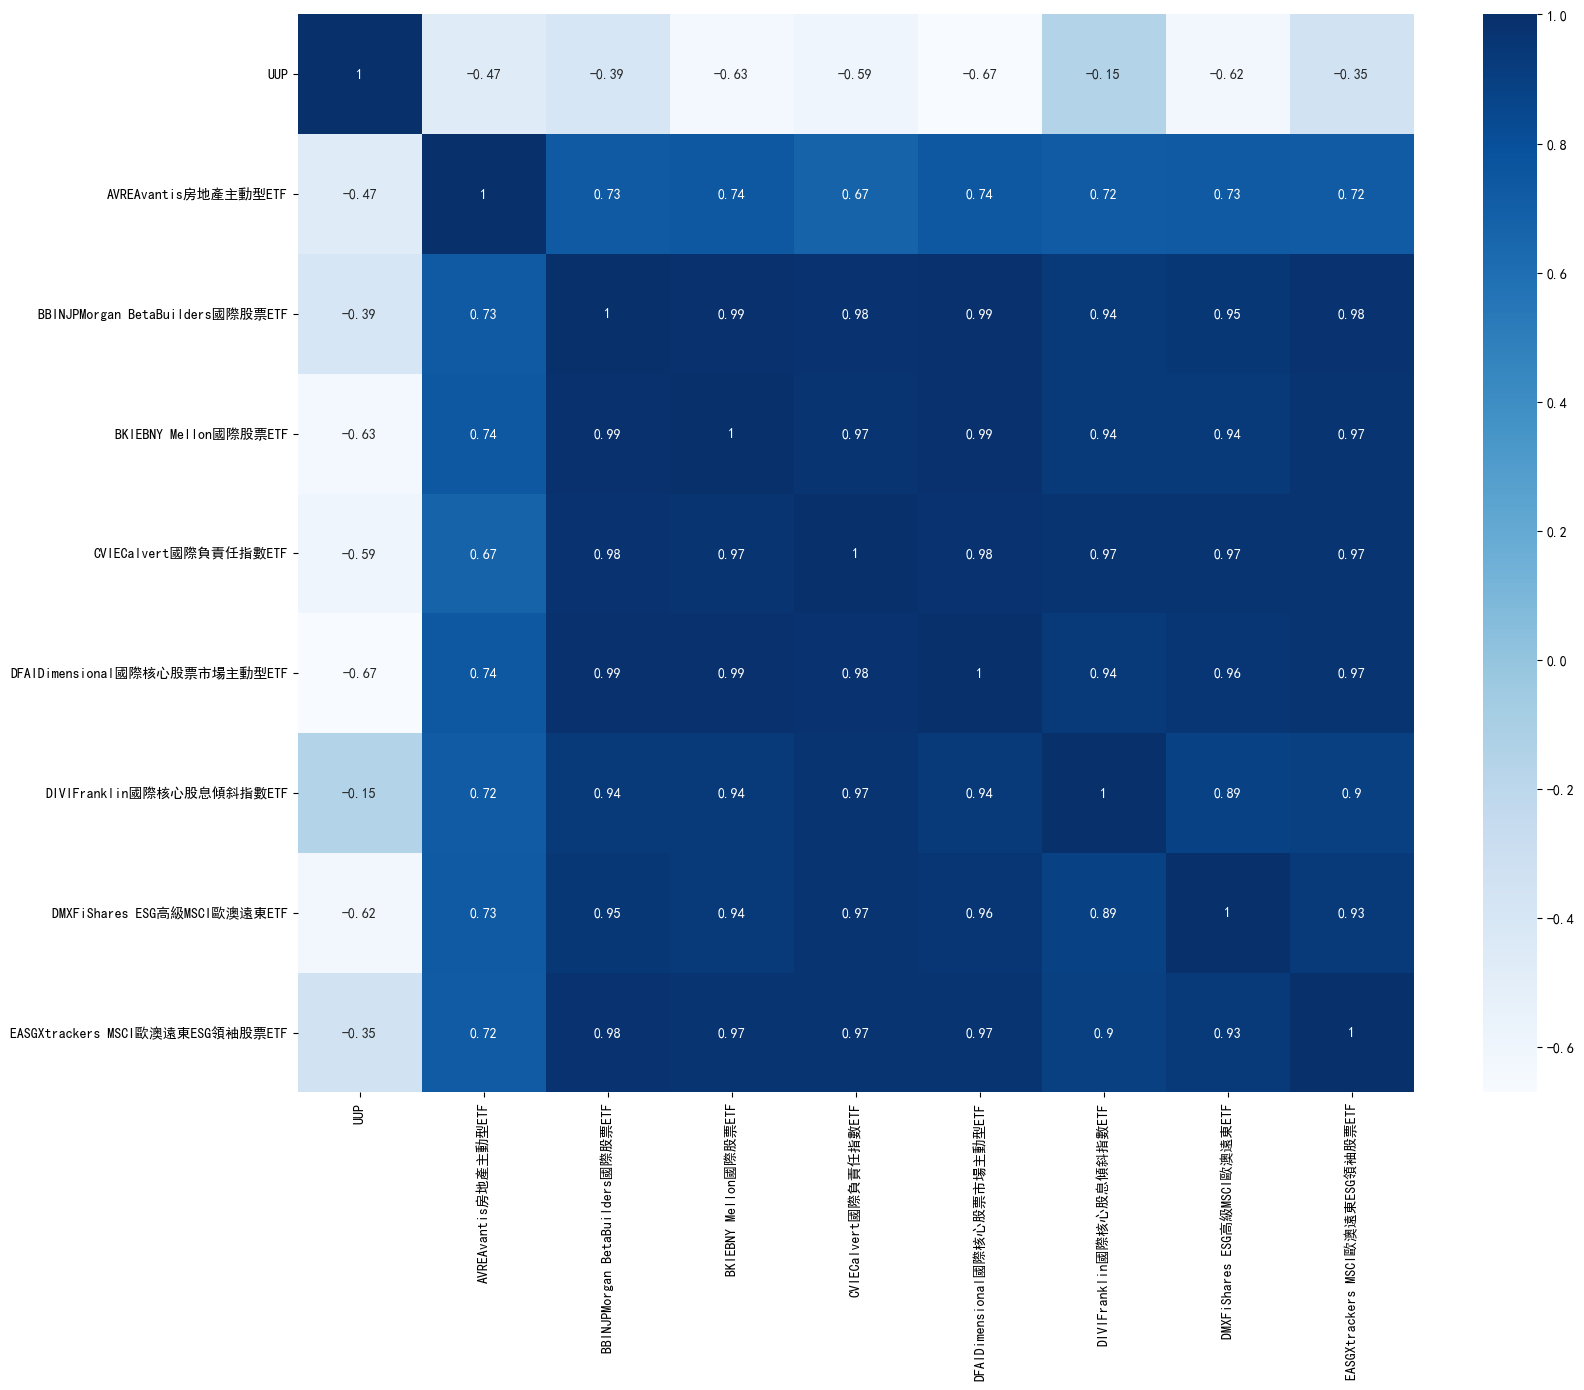

                 UUP      BKIE
Date                          
2020-04-27  0.997424  1.016637
2020-04-28  0.998893  1.008763
2020-04-29  0.995936  1.024084
2020-04-30  0.993694  0.978972
2020-05-01  1.001120  0.976780
...              ...       ...
2024-04-01  1.003877  0.997428
2024-04-02  0.998596  0.989446
2024-04-03  0.995429  1.007832
2024-04-04  1.000000  0.991292
2024-04-05  1.001060  1.004055

[993 rows x 2 columns]
商品:UUP 權重:0.5
商品:BKIE 權重:0.5
投資組合年化報酬:0.08080253798744341
投資組合風險:1.8156678169071905e-05


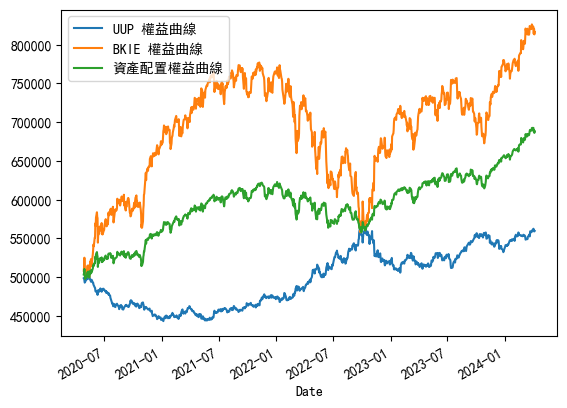

In [1]:
"""
美元計價-美元股票資產配置
1. 分配資產配置比例
2. 取得相關資產資料
3. 資產配置風險報酬計算
4. 資產配置權益曲線圖
"""

# 載入函數工具檔
from Data import getDataYF, getMultipleReturn
from FinancialMetrics import PortfolioRiskReturnRatio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 取出低成本 股市ETF
url = "https://www.moneydj.com/etf/eb/ET305001list.djhtm?A=22&B=&C=4&D=&E=&F=&G=&H=&I=&J=&K=&L=&O=&P=&Q=&T=&U=&R=100&X=&Y=&EB=&order=3&SS=&CC=&st=&EFX=&AP=&Z=2&M=0&S=6"
response = requests.get(url)
df = pd.read_html(response.text)[0]
stock_df = df[(df["幣別"] == "美元") & (df["管理費(%)"] < 0.2)]
stock_list = stock_df["代碼"].to_list()

# 抓到所有歷史報酬率
ret_dataframe = getMultipleReturn(getDataYF, ["UUP"] + stock_list, "adj close")
# 將商品代碼換成商品名稱
stock_name_list = (stock_df["代碼"] + stock_df["ETF名稱"]).to_list()
ret_dataframe.columns = ["UUP"] + stock_name_list

# 計算相關性
corr = round(ret_dataframe.corr(), 2)

# 並繪製熱力圖
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

# 股票美元資產配置比例
asset_allocation = {"UUP": 0.50, "BKIE": 0.50}

# 計算投資組合風險報酬
PortfolioRiskReturnRatio(getDataYF, asset_allocation, "adj close", 500000)
